In [98]:
import keras
from keras import layers
from keras.datasets import mnist,cifar100
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [99]:
y_train[0]

5

5


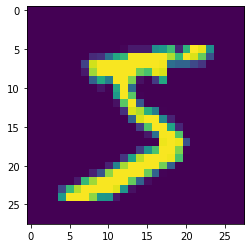

In [ ]:
plt.imshow(x_train[0])
print(y_train[0])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

In [87]:
dim_imagen = 64

In [89]:
entrada = keras.Input(shape=(784,))
encoded = layers.Dense(dim_imagen, activation="relu")(entrada)
decoded = layers.Dense(784, activation="sigmoid")(encoded)

autoencoder = keras.Model(entrada,decoded) #Que vamos a usar en la reconstrucción

In [90]:
encoder = keras.Model(entrada,encoded)
encoder_input = keras.Input(shape=(dim_imagen,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoder_input, decoder_layer(encoder_input))

In [91]:
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

In [92]:
autoencoder.fit(x_train,x_train,epochs=20,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1971 - val_loss: 0.0903
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0865 - val_loss: 0.0778
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0777 - val_loss: 0.0752
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0755 - val_loss: 0.0743
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0747 - val_loss: 0.0737
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0744 - val_loss: 0.0734
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - val_loss: 0.0734
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - val_loss: 0.0733
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0737 - val_loss: 0.0732
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.073

In [93]:
images_codificadas = encoder.predict(x_test)

In [94]:
images_codificadas[0].shape

(64,)

In [95]:
imagenes_reconstruidas = decoder.predict(images_codificadas)

In [96]:
x_test[0].shape

(784,)

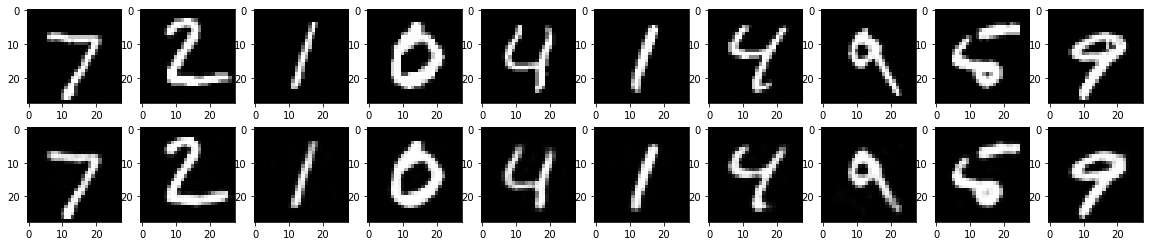

In [97]:
n = 10
plt.figure(figsize=(20,4))

for i in range(0,n):
  ax = plt.subplot(2,n,i+1)
  #Imágen original
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()

  #Imagen reconstruida
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(imagenes_reconstruidas[i].reshape(28,28))
  plt.gray()

plt.show()

In [110]:
#Segundo dataset

(x_train, y_train), (x_test, y_test) = cifar100.load_data()


In [111]:
x_train = x_train/255
x_test = x_test/255

In [112]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


[19]


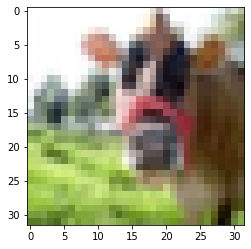

In [113]:
plt.imshow(x_train[0])
print(y_train[0])

In [114]:
x_train = x_train.reshape(50000,32*32*3)
x_test = x_test.reshape(10000,32*32*3)

In [120]:
dim_imagen = 128
entrada = keras.Input(shape=(3072,))
encoded = layers.Dense(dim_imagen, activation="relu")(entrada)
decoded = layers.Dense(3072, activation="sigmoid")(encoded)

autoencoder = keras.Model(entrada,decoded) #Que vamos a usar en la reconstrucción

In [121]:
encoder = keras.Model(entrada,encoded)
encoder_input = keras.Input(shape=(dim_imagen,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoder_input, decoder_layer(encoder_input))

In [122]:
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

In [123]:
autoencoder.fit(x_train,x_train,epochs=20,
                validation_data=(x_test, x_test))

Epoch 1/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6198 - val_loss: 0.5776
Epoch 2/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5746 - val_loss: 0.5719
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5681 - val_loss: 0.5664
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5672 - val_loss: 0.5676
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5665 - val_loss: 0.5658
Epoch 6/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5663 - val_loss: 0.5658
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5667 - val_loss: 0.5652
Epoch 8/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5654 - val_loss: 0.5652
Epoch 9/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5650 - val_loss: 0.5663
Epoch 10/20
1563/1563 [==============================] - 20s 13m

In [124]:
images_codificadas = encoder.predict(x_test)

In [126]:
imagenes_reconstruidas = decoder.predict(images_codificadas)

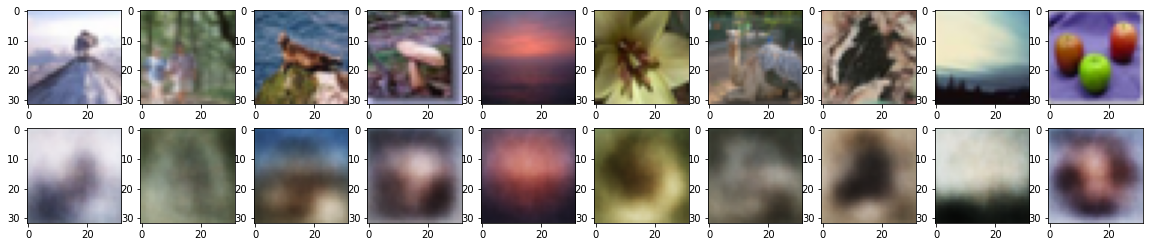

In [129]:
n = 10
plt.figure(figsize=(20,4))

for i in range(0,n):
  ax = plt.subplot(2,n,i+1)
  #Imágen original
  plt.imshow(x_test[i].reshape((32,32,3)))


  #Imagen reconstruida
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(imagenes_reconstruidas[i].reshape((32,32,3)))


plt.show()